## Import Libraries

In [1]:
import numpy as np
import requests
import os

# visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Added Regex for Data Cleansing
import regex as re

import warnings
warnings.filterwarnings('ignore')

## Load Data

In [2]:
# Function To Load Dataset into local
def load_dataset(path, urls):
    if not os.path.exists(path):
        os.mkdir(path)

    for url in urls:
        data = requests.get(url).content
        filename = os.path.join(path, os.path.basename(url))
        with open(filename, "wb") as file:
            file.write(data)
            
# Dataset Public Storage
root = "https://raw.githubusercontent.com/RyoKusnadi/CSV/master/"

In [3]:
# Dataset Source in this project:
# http://ridi.staff.ugm.ac.id/2019/03/06/indonesia-sentiment-analysis-dataset/
# https://atapdata.ai/dataset/243
urls = [root+"HateSpeechText_new.csv",root+"posneg.csv",root+"hate_speech_dataset.csv"]
load_dataset('data', urls)

### Import Data to Data Frame

In [4]:
## Load Data
mainUncleanData = pd.read_csv("data/hate_speech_dataset.csv")
# Use space Seperator due the Dataset separator Requirement , use index_col to avoid pandas create index
UnCleaned01 = pd.read_csv("data/HateSpeechText_new.csv", sep=';',usecols=[0,1])
# Use usecols to get first two columns
UnCleaned02 = pd.read_csv("data/posneg.csv", usecols=[0,1])

### Dataset Cleansing

In [5]:
# Added Function to Remove Special Character
def strip_character(dataCol):
    r = re.compile(r'[^a-zA-Z !@#$%&*_+-=|\:";<>,./()[\]{}\']')
    return r.sub('', dataCol)

#### Dataset "Uncleaned01"

In [6]:
# Remove all special character on Tweet
UnCleaned01['Tweet'] = UnCleaned01['Tweet'].apply(strip_character)
UnCleaned01 = UnCleaned01.drop_duplicates()
# Change Sentiment Value into string instead of int
UnCleaned01['HS'] = UnCleaned01['HS'].map({1: 'HS', 0:'Non_HS'}).astype(str)

In [7]:
UnCleaned01.rename(columns = {'HS':'Label'}, inplace = True)

#### Dataset "Uncleaned02"

In [8]:
# Swap column order to follow Uncleaned02 order
UnCleaned02 = UnCleaned02[['Positive','sentence']]
# Remove all special character on Tweet
UnCleaned02['sentence'] = UnCleaned02['sentence'].apply(strip_character)
UnCleaned02 = UnCleaned02.drop_duplicates()
UnCleaned02['Positive'] = UnCleaned02['Positive'].map({0: 'HS', 1:'Non_HS'}).astype(str)

In [9]:
UnCleaned02.rename(columns = {'Positive':'Label', 'sentence':'Tweet'}, inplace = True)

#### Merge All Dataset

In [10]:
tweet_df = pd.concat([mainUncleanData, UnCleaned01]).drop_duplicates().reset_index(drop=True)
#tweet_df = pd.concat([mainUncleanData]).drop_duplicates().reset_index(drop=True)

In [11]:
# contoh tweet Non_HS
tweet_df[tweet_df['Label']=='Non_HS'].head()

,Label,Tweet
0,Non_HS,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...
1,Non_HS,RT @baguscondromowo: Mereka terus melukai aksi...
2,Non_HS,Sylvi: bagaimana gurbernur melakukan kekerasan...
3,Non_HS,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja..."
4,Non_HS,RT @lisdaulay28: Waspada KTP palsu.....kawal P...


In [12]:
tweet_df['Tweet'][0]

'RT @spardaxyz: Fadli Zon Minta Mendagri Segera Menonaktifkan Ahok Jadi Gubernur DKI https:\\/\\/t.co\\/KH5vIRwPdO'

In [13]:
# contoh tweet HS
tweet_df[tweet_df['Label']=='HS'].head()

,Label,Tweet
444,HS,"Ini pasti salah Jokowi, Ahok dan kafir-kafir a..."
445,HS,@fahmiabuazzam1 biar aja biar tai nya kena bap...
446,HS,RT @BungWinar: Angin memporakporandakan basis ...
447,HS,"RT @Lupuz0503: Prestasi Ahok, \nSelain mjadi m..."
448,HS,Ulama Kompak Nyatakan #HaramPemimpinKafir Pili...


In [14]:
tweet_df['Tweet'][453]

'@Zufrianto3 lebih baik pilih ahok drpd pilih yg se iman tp koruptor dn munafik !! Bodoh kau'

In [15]:
# check missing values
tweet_df.isnull().sum().sort_values(ascending=False)

Label    0
Tweet    0
dtype: int64

Tidak ada missing values

## Class Distribution

Non_HS    11282
HS         7511
Name: Label, dtype: int64


AxesSubplot(0.125,0.125;0.775x0.755)


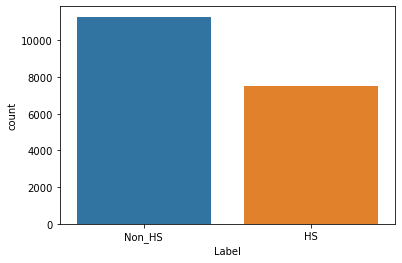

In [16]:
print(tweet_df['Label'].value_counts())
print('\n')
print(sns.countplot(tweet_df['Label']))

Jumlah kelas Non_HS lebih banyak dari jumlah kelas HS

In [17]:
jum_Non_HS = tweet_df[tweet_df['Label']=='Non_HS']['Label'].count()
jum_HS = tweet_df[tweet_df['Label']=='HS']['Label'].count()

percent_Non_HS = (jum_Non_HS/(jum_Non_HS+jum_HS)*100)
percent_HS= (jum_HS/(jum_Non_HS+jum_Non_HS))*100
print(percent_Non_HS)
print(percent_HS)

60.03299100728995
33.28753767062578


In [18]:
# info dataset
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18793 entries, 0 to 18792
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   18793 non-null  object
 1   Tweet   18793 non-null  object
dtypes: object(2)
memory usage: 293.8+ KB


In [19]:
# describe dataset
tweet_df.describe()

,Label,Tweet
count,18793,18793
unique,2,18777
top,Non_HS,i just dont fucking undestand with these fucki...
freq,11282,2


array([<AxesSubplot:title={'center':'HS'}>,
       <AxesSubplot:title={'center':'Non_HS'}>], dtype=object)

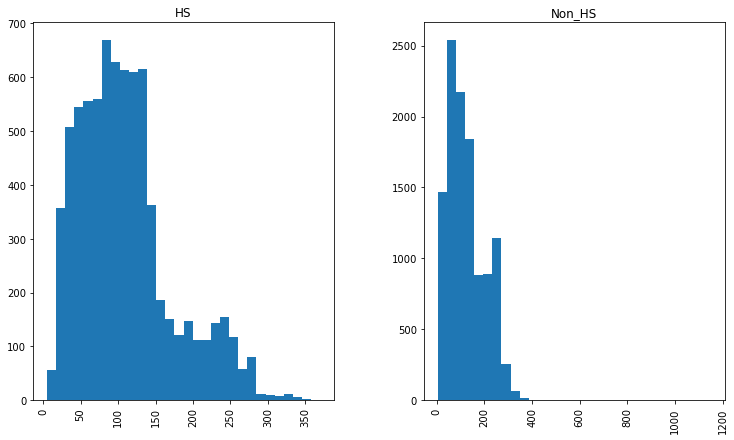

In [20]:
tweet_df['length'] = tweet_df['Tweet'].apply(len)
tweet_df.hist(column='length', by='Label', bins=30, figsize=(12,7))

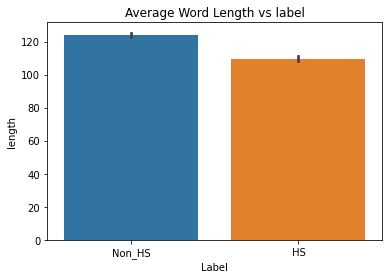

In [21]:
fig1 = sns.barplot(x='Label',y='length',data = tweet_df)
plt.title('Average Word Length vs label')
plot = fig1.get_figure()

## Preprocessing

In [22]:
df =tweet_df.copy()

### Case Folding

In [23]:
import re

In [24]:
def case_folding(data):
  temp_tweet = []

  for tw in data:
    # removal of @name[mention]
    tw = re.sub(r"(?:\@|https?\://)\S+", "", tw)

    # removal of links[https://blabala.com]
    # tw = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", "", tw)
    tw = re.sub(r"http\S+", "", tw)

    # removal of new line
    tw = re.sub('\n', '', tw)

    # removal of RT
    tw = re.sub('RT', '', tw)

    # removal of punctuations and numbers
    tw = re.sub("[^a-zA-Z^']", " ", tw)
    tw = re.sub(" {2,}", " ", tw)

    # remove leading and trailing whitespace
    tw = tw.strip()

    # remove whitespace with a single space
    tw = re.sub(r'\s+', ' ', tw)

    # convert text to Lowercase
    tw = tw.lower();
    temp_tweet.append(tw)
  return temp_tweet

In [25]:
df['Case_folded']=case_folding(df['Tweet'])
df.head()

,Label,Tweet,length,Case_folded
0,Non_HS,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...,110,fadli zon minta mendagri segera menonaktifkan ...
1,Non_HS,RT @baguscondromowo: Mereka terus melukai aksi...,108,mereka terus melukai aksi dalam rangka memenja...
2,Non_HS,Sylvi: bagaimana gurbernur melakukan kekerasan...,116,sylvi bagaimana gurbernur melakukan kekerasan ...
3,Non_HS,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja...",115,ahmad dhani tak puas debat pilkada masalah jal...
4,Non_HS,RT @lisdaulay28: Waspada KTP palsu.....kawal P...,79,waspada ktp palsu kawal pilkada


### Tokenize

In [26]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
def tokenized(data):
  return data.apply(nltk.word_tokenize)

In [28]:
df['Tokenized']=tokenized(df['Case_folded'])
df.head()

,Label,Tweet,length,Case_folded,Tokenized
0,Non_HS,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...,110,fadli zon minta mendagri segera menonaktifkan ...,"[fadli, zon, minta, mendagri, segera, menonakt..."
1,Non_HS,RT @baguscondromowo: Mereka terus melukai aksi...,108,mereka terus melukai aksi dalam rangka memenja...,"[mereka, terus, melukai, aksi, dalam, rangka, ..."
2,Non_HS,Sylvi: bagaimana gurbernur melakukan kekerasan...,116,sylvi bagaimana gurbernur melakukan kekerasan ...,"[sylvi, bagaimana, gurbernur, melakukan, keker..."
3,Non_HS,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja...",115,ahmad dhani tak puas debat pilkada masalah jal...,"[ahmad, dhani, tak, puas, debat, pilkada, masa..."
4,Non_HS,RT @lisdaulay28: Waspada KTP palsu.....kawal P...,79,waspada ktp palsu kawal pilkada,"[waspada, ktp, palsu, kawal, pilkada]"


### Stemming

In [29]:
!pip install Sastrawi

In [30]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [31]:
def stemming(data):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()

  return [stemmer.stem(tweet) for tweet in data]

In [32]:
df['Stemmed'] = df['Tokenized'].apply(stemming)
df.head()

,Label,Tweet,length,Case_folded,Tokenized,Stemmed
0,Non_HS,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...,110,fadli zon minta mendagri segera menonaktifkan ...,"[fadli, zon, minta, mendagri, segera, menonakt...","[fadli, zon, minta, mendagri, segera, nonaktif..."
1,Non_HS,RT @baguscondromowo: Mereka terus melukai aksi...,108,mereka terus melukai aksi dalam rangka memenja...,"[mereka, terus, melukai, aksi, dalam, rangka, ...","[mereka, terus, luka, aksi, dalam, rangka, pen..."
2,Non_HS,Sylvi: bagaimana gurbernur melakukan kekerasan...,116,sylvi bagaimana gurbernur melakukan kekerasan ...,"[sylvi, bagaimana, gurbernur, melakukan, keker...","[sylvi, bagaimana, gurbernur, laku, keras, per..."
3,Non_HS,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja...",115,ahmad dhani tak puas debat pilkada masalah jal...,"[ahmad, dhani, tak, puas, debat, pilkada, masa...","[ahmad, dhani, tak, puas, debat, pilkada, masa..."
4,Non_HS,RT @lisdaulay28: Waspada KTP palsu.....kawal P...,79,waspada ktp palsu kawal pilkada,"[waspada, ktp, palsu, kawal, pilkada]","[waspada, ktp, palsu, kawal, pilkada]"


### Slang Words Removal

In [33]:
import requests

In [34]:
slang_word = requests.get('https://raw.githubusercontent.com/louisowen6/NLP_bahasa_resources/master/combined_slang_words.txt').text
dict_slang = eval(slang_word)

In [35]:
dict_slang.items()

dict_items([('@', 'di'), ('abis', 'habis'), ('ad', 'ada'), ('adlh', 'adalah'), ('afaik', 'as far as i know'), ('ahaha', 'haha'), ('aj', 'saja'), ('ajep-ajep', 'dunia gemerlap'), ('ak', 'saya'), ('akika', 'aku'), ('akkoh', 'aku'), ('akuwh', 'aku'), ('alay', 'norak'), ('alow', 'halo'), ('ambilin', 'ambilkan'), ('ancur', 'hancur'), ('anjrit', 'anjing'), ('anter', 'antar'), ('ap2', 'apa-apa'), ('apasih', 'apa sih'), ('apes', 'sial'), ('aps', 'apa'), ('aq', 'saya'), ('aquwh', 'aku'), ('asbun', 'asal bunyi'), ('aseekk', 'asyik'), ('asekk', 'asyik'), ('asem', 'asam'), ('aspal', 'asli tetapi palsu'), ('astul', 'asal tulis'), ('ato', 'atau'), ('au ah', 'tidak mau tahu'), ('awak', 'saya'), ('ay', 'sayang'), ('ayank', 'sayang'), ('b4', 'sebelum'), ('bakalan', 'akan'), ('bandes', 'bantuan desa'), ('bangedh', 'banget'), ('banpol', 'bantuan polisi'), ('banpur', 'bantuan tempur'), ('basbang', 'basi'), ('bcanda', 'bercanda'), ('bdg', 'bandung'), ('begajulan', 'nakal'), ('beliin', 'belikan'), ('bencong

In [36]:
slang_df = pd.DataFrame(dict_slang.items(), columns=['Old', 'New'])
slang_df.head()

,Old,New
0,@,di
1,abis,habis
2,ad,ada
3,adlh,adalah
4,afaik,as far as i know


In [37]:
# remove trailing white space
slang_df['Old'] = slang_df['Old'].apply(lambda x: x.strip())
slang_df['New'] = slang_df['New'].apply(lambda x: x.strip())

In [38]:
# transform into key value in a dict
slang_dict = {}
for i, row in slang_df.iterrows():
  slang_dict.update({row['Old']: row['New']})

In [39]:
def removeSlang(data):
  # iterate through data
  for i, word in enumerate(data):
    # check if data in slang dictionary or not
    try:
      data[i] = slang_dict[word]
    # if data is not slang then pass
    except KeyError:
      pass
  return data

In [40]:
df['No_Slang'] = df['Stemmed'].apply(removeSlang)
df.head()

,Label,Tweet,length,Case_folded,Tokenized,Stemmed,No_Slang
0,Non_HS,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...,110,fadli zon minta mendagri segera menonaktifkan ...,"[fadli, zon, minta, mendagri, segera, menonakt...","[fadli, zon, minta, mendagri, segera, nonaktif...","[fadli, zon, minta, mendagri, segera, nonaktif..."
1,Non_HS,RT @baguscondromowo: Mereka terus melukai aksi...,108,mereka terus melukai aksi dalam rangka memenja...,"[mereka, terus, melukai, aksi, dalam, rangka, ...","[mereka, terus, luka, aksi, dalam, rangka, pen...","[mereka, terus, luka, aksi, dalam, rangka, pen..."
2,Non_HS,Sylvi: bagaimana gurbernur melakukan kekerasan...,116,sylvi bagaimana gurbernur melakukan kekerasan ...,"[sylvi, bagaimana, gurbernur, melakukan, keker...","[sylvi, bagaimana, gurbernur, laku, keras, per...","[sylvi, bagaimana, gurbernur, laku, keras, per..."
3,Non_HS,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja...",115,ahmad dhani tak puas debat pilkada masalah jal...,"[ahmad, dhani, tak, puas, debat, pilkada, masa...","[ahmad, dhani, tidak, puas, debat, pemilihan k...","[ahmad, dhani, tidak, puas, debat, pemilihan k..."
4,Non_HS,RT @lisdaulay28: Waspada KTP palsu.....kawal P...,79,waspada ktp palsu kawal pilkada,"[waspada, ktp, palsu, kawal, pilkada]","[waspada, ktp, palsu, kawal, pemilihan kepala ...","[waspada, ktp, palsu, kawal, pemilihan kepala ..."


### Stop Words Removal

In [41]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
def removeStopWords(data):
  stop_words = set(stopwords.words('indonesian'))
  return data.apply(lambda x: [item for item in x if item not in stop_words])

In [43]:
df['No_Stop']=removeStopWords(df['No_Slang'])
df.head()

,Label,Tweet,length,Case_folded,Tokenized,Stemmed,No_Slang,No_Stop
0,Non_HS,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...,110,fadli zon minta mendagri segera menonaktifkan ...,"[fadli, zon, minta, mendagri, segera, menonakt...","[fadli, zon, minta, mendagri, segera, nonaktif...","[fadli, zon, minta, mendagri, segera, nonaktif...","[fadli, zon, mendagri, nonaktif, ahok, gubernu..."
1,Non_HS,RT @baguscondromowo: Mereka terus melukai aksi...,108,mereka terus melukai aksi dalam rangka memenja...,"[mereka, terus, melukai, aksi, dalam, rangka, ...","[mereka, terus, luka, aksi, dalam, rangka, pen...","[mereka, terus, luka, aksi, dalam, rangka, pen...","[luka, aksi, rangka, penjara, ahok, ahok, gaga..."
2,Non_HS,Sylvi: bagaimana gurbernur melakukan kekerasan...,116,sylvi bagaimana gurbernur melakukan kekerasan ...,"[sylvi, bagaimana, gurbernur, melakukan, keker...","[sylvi, bagaimana, gurbernur, laku, keras, per...","[sylvi, bagaimana, gurbernur, laku, keras, per...","[sylvi, gurbernur, laku, keras, perempuan, buk..."
3,Non_HS,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja...",115,ahmad dhani tak puas debat pilkada masalah jal...,"[ahmad, dhani, tak, puas, debat, pilkada, masa...","[ahmad, dhani, tidak, puas, debat, pemilihan k...","[ahmad, dhani, tidak, puas, debat, pemilihan k...","[ahmad, dhani, puas, debat, pemilihan kepala d..."
4,Non_HS,RT @lisdaulay28: Waspada KTP palsu.....kawal P...,79,waspada ktp palsu kawal pilkada,"[waspada, ktp, palsu, kawal, pilkada]","[waspada, ktp, palsu, kawal, pemilihan kepala ...","[waspada, ktp, palsu, kawal, pemilihan kepala ...","[waspada, ktp, palsu, kawal, pemilihan kepala ..."


## Encoding Target Value

In [44]:
df['Label'] = df['Label'].apply(lambda x: 1 if x == 'HS' else 0)
df.head()

,Label,Tweet,length,Case_folded,Tokenized,Stemmed,No_Slang,No_Stop
0,0,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...,110,fadli zon minta mendagri segera menonaktifkan ...,"[fadli, zon, minta, mendagri, segera, menonakt...","[fadli, zon, minta, mendagri, segera, nonaktif...","[fadli, zon, minta, mendagri, segera, nonaktif...","[fadli, zon, mendagri, nonaktif, ahok, gubernu..."
1,0,RT @baguscondromowo: Mereka terus melukai aksi...,108,mereka terus melukai aksi dalam rangka memenja...,"[mereka, terus, melukai, aksi, dalam, rangka, ...","[mereka, terus, luka, aksi, dalam, rangka, pen...","[mereka, terus, luka, aksi, dalam, rangka, pen...","[luka, aksi, rangka, penjara, ahok, ahok, gaga..."
2,0,Sylvi: bagaimana gurbernur melakukan kekerasan...,116,sylvi bagaimana gurbernur melakukan kekerasan ...,"[sylvi, bagaimana, gurbernur, melakukan, keker...","[sylvi, bagaimana, gurbernur, laku, keras, per...","[sylvi, bagaimana, gurbernur, laku, keras, per...","[sylvi, gurbernur, laku, keras, perempuan, buk..."
3,0,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja...",115,ahmad dhani tak puas debat pilkada masalah jal...,"[ahmad, dhani, tak, puas, debat, pilkada, masa...","[ahmad, dhani, tidak, puas, debat, pemilihan k...","[ahmad, dhani, tidak, puas, debat, pemilihan k...","[ahmad, dhani, puas, debat, pemilihan kepala d..."
4,0,RT @lisdaulay28: Waspada KTP palsu.....kawal P...,79,waspada ktp palsu kawal pilkada,"[waspada, ktp, palsu, kawal, pilkada]","[waspada, ktp, palsu, kawal, pemilihan kepala ...","[waspada, ktp, palsu, kawal, pemilihan kepala ...","[waspada, ktp, palsu, kawal, pemilihan kepala ..."


In [45]:
# combine cleaned text after removing stop words into one string
df['Ready'] = df['No_Stop'].apply(lambda x: ' '.join(x))
df.head()

,Label,Tweet,length,Case_folded,Tokenized,Stemmed,No_Slang,No_Stop,Ready
0,0,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...,110,fadli zon minta mendagri segera menonaktifkan ...,"[fadli, zon, minta, mendagri, segera, menonakt...","[fadli, zon, minta, mendagri, segera, nonaktif...","[fadli, zon, minta, mendagri, segera, nonaktif...","[fadli, zon, mendagri, nonaktif, ahok, gubernu...",fadli zon mendagri nonaktif ahok gubernur dki
1,0,RT @baguscondromowo: Mereka terus melukai aksi...,108,mereka terus melukai aksi dalam rangka memenja...,"[mereka, terus, melukai, aksi, dalam, rangka, ...","[mereka, terus, luka, aksi, dalam, rangka, pen...","[mereka, terus, luka, aksi, dalam, rangka, pen...","[luka, aksi, rangka, penjara, ahok, ahok, gaga...",luka aksi rangka penjara ahok ahok gagal pemil...
2,0,Sylvi: bagaimana gurbernur melakukan kekerasan...,116,sylvi bagaimana gurbernur melakukan kekerasan ...,"[sylvi, bagaimana, gurbernur, melakukan, keker...","[sylvi, bagaimana, gurbernur, laku, keras, per...","[sylvi, bagaimana, gurbernur, laku, keras, per...","[sylvi, gurbernur, laku, keras, perempuan, buk...",sylvi gurbernur laku keras perempuan bukti fot...
3,0,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja...",115,ahmad dhani tak puas debat pilkada masalah jal...,"[ahmad, dhani, tak, puas, debat, pilkada, masa...","[ahmad, dhani, tidak, puas, debat, pemilihan k...","[ahmad, dhani, tidak, puas, debat, pemilihan k...","[ahmad, dhani, puas, debat, pemilihan kepala d...",ahmad dhani puas debat pemilihan kepala daerah...
4,0,RT @lisdaulay28: Waspada KTP palsu.....kawal P...,79,waspada ktp palsu kawal pilkada,"[waspada, ktp, palsu, kawal, pilkada]","[waspada, ktp, palsu, kawal, pemilihan kepala ...","[waspada, ktp, palsu, kawal, pemilihan kepala ...","[waspada, ktp, palsu, kawal, pemilihan kepala ...",waspada ktp palsu kawal pemilihan kepala daerah


## Combine Cleaned Tweet and Label

In [46]:
data1 = df[['Ready']]
data2 = df[['Label']]
dataset = pd.concat([data1, data2], axis=1)
dataset.head()

,Ready,Label
0,fadli zon mendagri nonaktif ahok gubernur dki,0
1,luka aksi rangka penjara ahok ahok gagal pemil...,0
2,sylvi gurbernur laku keras perempuan bukti fot...,0
3,ahmad dhani puas debat pemilihan kepala daerah...,0
4,waspada ktp palsu kawal pemilihan kepala daerah,0


## Text Vectorization (TF-IDF)

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [48]:
X = dataset['Ready']
label = dataset['Label']

In [49]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vector = tfidf_vectorizer.fit_transform(X)
tfidf_vector.shape

(18793, 31703)

## Dealing With Imbalance Class

In [50]:
from imblearn.over_sampling import SMOTE

In [51]:
sampler = SMOTE()
tfidf_vector, label = sampler.fit_resample(tfidf_vector, label)
print(tfidf_vector.shape)
print(label.shape)

(22564, 31703)
(22564,)


## Split Data (Training and Testing Data)

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_vector, label, test_size=0.33, shuffle=True, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15117, 31703)
(7447, 31703)
(15117,)
(7447,)


## Most Common Words VS Importants Words

In [54]:
feature_names = np.array(tfidf_vectorizer.get_feature_names())

# Sort TFIDF by value
max_tf_idfs = X_train.max(0).toarray()[0] # Get largest tfidf values across all documents.
sorted_tf_idxs = max_tf_idfs.argsort() # Sorted indices
sorted_tf_idfs = max_tf_idfs[sorted_tf_idxs] # Sorted TFIDF values

# feature_names doesn't need to be sorted! You just access it with a list of sorted indices!
smallest_tf_idfs = pd.Series(sorted_tf_idfs[:10], index=feature_names[sorted_tf_idxs[:10]])                    
largest_tf_idfs = pd.Series(sorted_tf_idfs[-10:][::-1], index=feature_names[sorted_tf_idxs[-10:][::-1]])

In [55]:
print('Most common words:\n', smallest_tf_idfs)
print('\n')
print('Most important words:\n', largest_tf_idfs)

Most common words:
 sumpaaah          0.0
hopeful           0.0
syafaat           0.0
hormon            0.0
hornedscreamer    0.0
sxc               0.0
hospitality       0.0
hooo              0.0
hotman            0.0
houstontoad       0.0
dtype: float64


Most important words:
 berak       1.0
bebal       1.0
asing       1.0
klik        1.0
cocot       1.0
bajing      1.0
user        1.0
keren       1.0
silah       1.0
viralkan    1.0
dtype: float64


##WordCloud

In [56]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

### Hate Speech Wordcloud

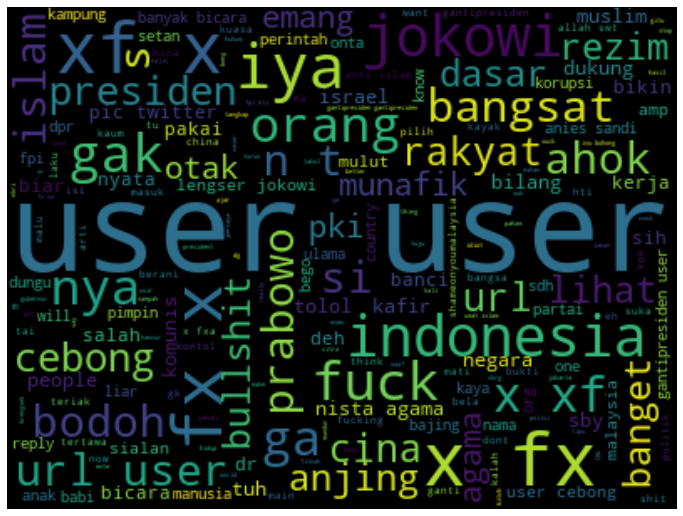

In [57]:
hs_words = ' '.join([word for word in dataset['Ready'][dataset['Label']==1]])
wordcloud = WordCloud(width=400, height=300, max_font_size=100).generate(hs_words)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Non Hate Speech Wordcloud

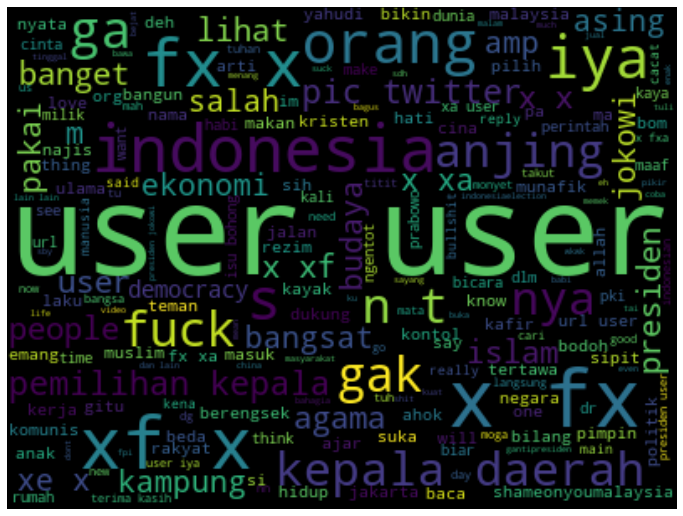

In [58]:
nonhs_words = ' '.join([word for word in dataset['Ready'][dataset['Label']==0]])
wordcloud = WordCloud(width=400, height=300, max_font_size=100).generate(nonhs_words)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Modelling

In [59]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics

In [60]:
def print_conf(y_test, result, classes, title='Confusion matrix'):
  conf_matrix = metrics.confusion_matrix(y_test, result)
  plt.figure(figsize=(6,6))
  sns.heatmap(conf_matrix, 
              annot=True,
              xticklabels=classes, 
              yticklabels=classes,
              cmap="Blues",
              fmt='d')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.title(title)
  plt.show()

### SVM

In [61]:
from sklearn.svm import SVC

In [62]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train) #training svc model
y_pred_svc = svc.predict(X_test) # predicting test data

In [63]:
print(svc.score(X_train, y_train))
print(svc.score(X_test, y_test))

0.9334524045776278
0.8320128910970861


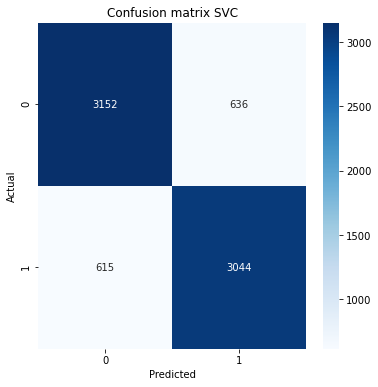

In [64]:
print_conf(y_test, y_pred_svc, [0, 1], title="Confusion matrix SVC")

In [65]:
print(metrics.classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      3788
           1       0.83      0.83      0.83      3659

    accuracy                           0.83      7447
   macro avg       0.83      0.83      0.83      7447
weighted avg       0.83      0.83      0.83      7447



### XGBOOST

In [66]:
from xgboost import XGBClassifier

In [67]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train) #training svc model
y_pred_xgb = xgb.predict(X_test) # predicting test data

[23:52:25] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [68]:
print(xgb.score(X_train, y_train))
print(xgb.score(X_test, y_test))

0.8860885096249256
0.8200617698402041


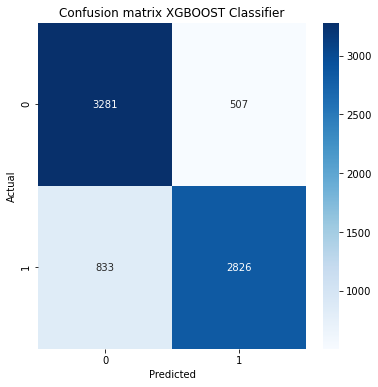

In [69]:
print_conf(y_test, y_pred_xgb, [0, 1], title="Confusion matrix XGBOOST Classifier")

In [70]:
print(metrics.classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83      3788
           1       0.85      0.77      0.81      3659

    accuracy                           0.82      7447
   macro avg       0.82      0.82      0.82      7447
weighted avg       0.82      0.82      0.82      7447



#### XGBOOOST - RandomizedSearchCV

In [71]:
from sklearn.model_selection import RandomizedSearchCV

In [72]:
params = {'learning_rate': [0.025, 0.05, 0.075, 0.1], #so called `eta` value
          'max_depth': [6, 7, 8],
          'min_child_weight': [i for i in range(1, 11, 2)],
          'n_estimators': [100, 250, 500] #number of trees, change it to 1000 for better results
}


In [73]:
random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=5, scoring='f1', n_jobs=-1, cv=5, verbose=3)

In [74]:
random_search.fit(tfidf_vector, label)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[23:54:50] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=12,
                                           num_parallel_tree=1, random_state=0,
                                           reg_alpha=0, reg_lambda=1,
                                      

In [75]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.075, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [76]:
random_search.best_params_

{'n_estimators': 500,
 'min_child_weight': 1,
 'max_depth': 6,
 'learning_rate': 0.075}

In [77]:
xgb_rscv = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.025, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=1, n_estimators=250, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
xgb_rscv.fit(X_train, y_train) #training svc model
y_pred_xgb_rscv = xgb_rscv.predict(X_test) # predicting test data

[23:55:06] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [78]:
print(xgb_rscv.score(X_train, y_train))
print(xgb_rscv.score(X_test, y_test))

0.8002249123503341
0.7737343896871224


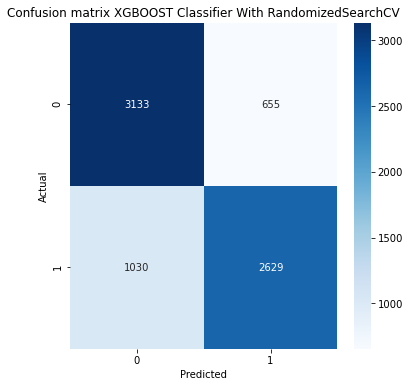

In [79]:
print_conf(y_test, y_pred_xgb_rscv, [0, 1], title="Confusion matrix XGBOOST Classifier With RandomizedSearchCV")

### Neural Network

In [80]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [81]:
# Import Libraries for Neural Network
from keras.models import Sequential
from keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.wrappers.scikit_learn import KerasClassifier

In [82]:
# Add model for Neural Network
input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(30, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(15, activation='relu'))
model.add(layers.Dense(15, activation='relu'))
model.add(layers.Dense(15, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
          
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                951120    
_________________________________________________________________
dense_1 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_2 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_3 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 16        
Total params: 952,081
Trainable params: 952,081
Non-trainable params: 0
_________________________________________________________________


In [83]:
# run model
history = model.fit(X_train.toarray(), y_train, epochs=10, verbose=True, validation_data=(X_test.toarray(), y_test), batch_size=10)

Epoch 1/10
1512/1512 [==============================] - 8s 5ms/step - loss: 0.4524 - accuracy: 0.7826 - val_loss: 0.3712 - val_accuracy: 0.8391
Epoch 2/10
1512/1512 [==============================] - 7s 5ms/step - loss: 0.1851 - accuracy: 0.9279 - val_loss: 0.4179 - val_accuracy: 0.8338
Epoch 3/10
1512/1512 [==============================] - 7s 5ms/step - loss: 0.0730 - accuracy: 0.9750 - val_loss: 0.5992 - val_accuracy: 0.8150
Epoch 4/10
1512/1512 [==============================] - 7s 5ms/step - loss: 0.0276 - accuracy: 0.9915 - val_loss: 0.7085 - val_accuracy: 0.8410
Epoch 5/10
1512/1512 [==============================] - 7s 5ms/step - loss: 0.0153 - accuracy: 0.9945 - val_loss: 0.7377 - val_accuracy: 0.8301
Epoch 6/10
1512/1512 [==============================] - 7s 5ms/step - loss: 0.0114 - accuracy: 0.9960 - val_loss: 0.9643 - val_accuracy: 0.8395
Epoch 7/10
1512/1512 [==============================] - 7s 5ms/step - loss: 0.0071 - accuracy: 0.9978 - val_loss: 1.0357 - val_accuracy:

In [84]:
# Check the Accuracy
loss, accuracy = model.evaluate(X_train.toarray(), y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test.toarray(), y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9989
Testing Accuracy:  0.8252


In [85]:
# Plot accuracy
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

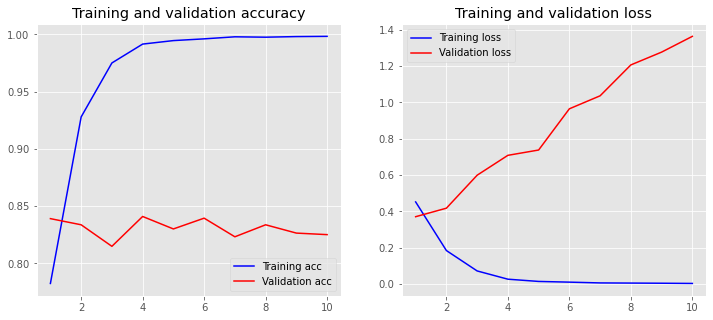

In [86]:
plot_history(history)

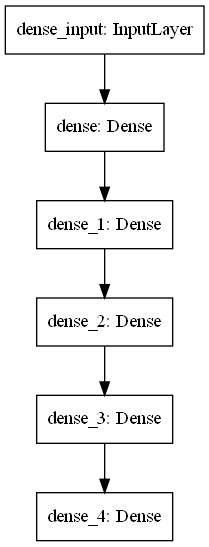

In [87]:
from keras.utils.vis_utils import plot_model
# Save Model Layer
plot_model(model)

In [88]:
# Save Model
model.save('model', save_format="tf")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model\assets


## Model Comparison

In [91]:
# Accuracy Comparison
models = ['SVM', 'XGBOOST', 'RandomSearchCV','Neural Network']
accSVMC = metrics.accuracy_score(y_test,y_pred_svc)
accXGB = metrics.accuracy_score(y_test, y_pred_xgb)
accXGB_RSCV = metrics.accuracy_score(y_test, y_pred_xgb_rscv)
accuracies = [accSVMC, accXGB, accXGB_RSCV , accuracy]
comp = pd.DataFrame(list(zip(models, accuracies)), columns=['Model', 'Accuracy'])
comp

,Model,Accuracy
0,SVM,0.832013
1,XGBOOST,0.820062
2,RandomSearchCV,0.773734
3,Neural Network,0.825164


In [92]:
import joblib

# Saving model
joblib.dump(svc, 'Hate Speech Classifier.joblib')
joblib.dump(tfidf_vectorizer, 'Hate Speech TF-IDF Vectorizer.joblib')

['Hate Speech TF-IDF Vectorizer.joblib']

In [ ]:
df['prediction'] = svc.predict(tfidf_vectorizer.transform(df['Tweet']))
df['prediction'] = df['prediction'].apply(lambda x: 'HS' if x==1 else 'Non_HS')

# Save new dataframe into csv file
df.to_csv('Hate Speech Classification.csv', index=False)

df.head()

## Predict New Data

In [ ]:
input_tweet = ['bunuh']

def preProcessText(tweer):
    new_tweets = []
    for tw in texts:
        tw = case_folding(tw)
        tw = tokenized(tw)
        tw = stemming(tw)
        tw = removeSlang(tw)
        tw = removeStopWords(tw)
        tw = ' '.join(tw)
        new_tweets.append(tw)

    return new_tweets

def predictNewData(tweets):
    saved_model = joblib.load('Hate Speech Classifier.joblib') 
    saved_tfidf = joblib.load('Hate Speech TF-IDF Vectorizer.joblib')

    vectorized_tweets = saved_tfidf.transform(tweets)
    input_prediction = saved_model.predict(vectorized_tweets)

    for i in range(len(input_tweet)):
        if input_prediction[i]==1:
               result = "\nHate Speech!\n"
        else:
                result = "\n Not Hate Speech!\n"
    return result
            
predictNewData(input_tweet)

In [ ]:
def predictNewData(tweets):
    saved_model = joblib.load('Hate Speech Classifier.joblib') 
    saved_tfidf = joblib.load('Hate Speech TF-IDF Vectorizer.joblib')

    vectorized_tweets = saved_tfidf.transform(tweets)
    input_prediction = saved_model.predict(vectorized_tweets)

    for i in range(len(input_tweet)):
        if input_prediction[i]==1:
               result = "\nHate Speech!\n"
        else:
               result = "\n Not Hate Speech!\n"
    return result

In [ ]:
predictNewData(input_tweet)